In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
print('Training data: {}, {}'.format(train_images.shape, train_labels.shape))

Training data: (60000, 28, 28), (60000,)


In [4]:
print('Test data: {}, {}'.format(test_images.shape, test_labels.shape))

Test data: (10000, 28, 28), (10000,)


In [5]:
class_labels = np.unique(train_labels)

print('There are {} classes in dataset. They are: {}'.format(len(class_labels), class_labels))

There are 10 classes in dataset. They are: [0 1 2 3 4 5 6 7 8 9]


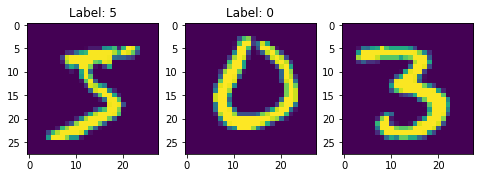

In [6]:
plt.figure(figsize=(8, 5))

plt.subplot(1, 3, 1)
plt.imshow(train_images[0])
plt.title('Label: {}'.format(train_labels[0]))

plt.subplot(1, 3, 2)
plt.imshow(train_images[2500])
plt.title('Label: {}'.format(train_labels[2500]))

plt.subplot(1, 3, 3)
plt.imshow(train_images[12])

plt.show()

In [7]:
# Before scaling
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
train_images = train_images/ 255.0
test_images = test_images/ 255.0

In [9]:
# After scaling
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
# Split training data to training and validation sets.
x_train = train_images[0:50000]
x_val = train_images[50000:]
y_train = train_labels[0:50000]
y_val = train_labels[50000:]

In [11]:
# Reshape data from 28 * 28 array to a single array
new_dimension = np.prod(train_images.shape[1:]) #np.prod() returns the product of array elements over a given axis.

x_train = x_train.reshape(x_train.shape[0], new_dimension)
x_val = x_val.reshape(x_val.shape[0], new_dimension)

test_images = test_images.reshape(test_images.shape[0], new_dimension)

print('X_train: {}'.format(x_train.shape))
print('X_val: {}'.format(x_val.shape))
print('test_images: {}'.format(test_images.shape))

X_train: (50000, 784)
X_val: (10000, 784)
test_images: (10000, 784)


In [12]:
# Encode labels to categorical variables
from tensorflow.keras.utils import to_categorical
no_labels = 10
y_train = to_categorical(y_train, no_labels)
y_val = to_categorical(y_val, no_labels)
y_test = to_categorical(test_labels, no_labels)

In [13]:
# placeholders are not enabled in tf 2
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

Instructions for updating:
non-resource variables are not supported in the long term


In [18]:
# inputs 
X = tf.placeholder(tf.float32, [None, new_dimension])
Y = tf.placeholder(tf.float32, [None, no_labels])

# create model architecture
def multilayer_perceptron(x, no_classes, first_layer_neurons= 256, second_layer_neurons= 128):
   
    # first layer
    first_weight = tf.Variable(tf.random_uniform([new_dimension, first_layer_neurons]))
    first_bias = tf.Variable(tf.zeros([first_layer_neurons]))
    first_layer_output = tf.nn.relu(tf.add(tf.matmul(x, first_weight), first_bias))
    
    # Second layer
    second_weight = tf.Variable(tf.random_uniform([first_layer_neurons, second_layer_neurons]))
    second_bias = tf.Variable(tf.zeros([second_layer_neurons]))
    second_layer_output = tf.nn.relu(tf.add(tf.matmul(first_layer_output, second_weight), second_bias))
    
    # Output layer
    final_weight = tf.Variable(tf.random_uniform([second_layer_neurons, no_classes]))
    final_bias = tf.Variable(tf.zeros([no_classes]))
    logits = tf.add(tf.matmul(second_layer_output, final_weight), final_bias)
    
    return logits

In [19]:
logits = multilayer_perceptron(X, no_labels)
learn_rate = 0.01
# Define the loss and optimiser for the network
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits= logits,
                                                                labels= Y))
optimiser = tf.train.AdamOptimizer(learning_rate= learn_rate)
train_op = optimiser.minimize(loss_op)

# Initialise the variables 
init = tf.global_variables_initializer()

epochs = 20
batch_size = 1000
iteration = len(x_train) // batch_size

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [22]:
# Trian model
with tf.Session() as session:
  session.run(init)
  for epoch in range(epochs):
    average_cost = 0
    start, end = 0, batch_size

    for i in range(iteration):
      batch_x, batch_y = x_train[start: end], y_train[start: end]
      _, loss = session.run([train_op, loss_op], feed_dict={X: batch_x, Y: batch_y})
      start += batch_size
      end += batch_size 
      #average loss
      average_cost += loss/iteration
    print("Epoch========{}".format(epoch))
    
  #evaluate model
  prediction = tf.nn.softmax(logits)
  ground_truth = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
  accuracy = tf.reduce_mean(tf.cast(ground_truth, "float"))
  print("Accuracy: {}".format(accuracy.eval({X: test_images, Y: y_test})))

Epoch========0
Epoch========1
Epoch========2
Epoch========3
Epoch========4
Epoch========5
Epoch========6
Epoch========7
Epoch========8
Epoch========9
Epoch========10
Epoch========11
Epoch========12
Epoch========13
Epoch========14
Epoch========15
Epoch========16
Epoch========17
Epoch========18
Epoch========19
Accuracy: 0.9121000170707703
